References-

https://en.wikipedia.org/wiki/Exponential_smoothing
https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html
https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel('../Data/monthly_data_total.xlsx')

df.head()

,Date,Import,Export
0,2006-01-01,12519.71,9143.66
1,2006-02-01,11479.69,8993.29
2,2006-03-01,14314.02,11560.97
3,2006-04-01,12924.18,8624.66
4,2006-05-01,15105.67,10109.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Import  169 non-null    float64       
 2   Export  169 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.0 KB


In [6]:
test_count = 13

In [7]:
df.index = df.Date

In [8]:
df.head()

,Date,Import,Export
Date,,,
2006-01-01,2006-01-01,12519.71,9143.66
2006-02-01,2006-02-01,11479.69,8993.29
2006-03-01,2006-03-01,14314.02,11560.97
2006-04-01,2006-04-01,12924.18,8624.66
2006-05-01,2006-05-01,15105.67,10109.30


In [9]:
df = df[['Import', 'Export']]

In [10]:
df.head()

,Import,Export
Date,,
2006-01-01,12519.71,9143.66
2006-02-01,11479.69,8993.29
2006-03-01,14314.02,11560.97
2006-04-01,12924.18,8624.66
2006-05-01,15105.67,10109.30


In [11]:
df.tail()

,Import,Export
Date,,
2019-09-01,37693.81,26007.97
2019-10-01,37241.53,26213.39
2019-11-01,38101.94,25630.87
2019-12-01,38577.34,27142.63
2020-01-01,41146.86,25882.90


In [12]:
df.shape

(169, 2)

In [13]:
df = df.resample('M').sum()

In [14]:
df.shape

(169, 2)

Text(0, 0.5, 'Values in million US $')

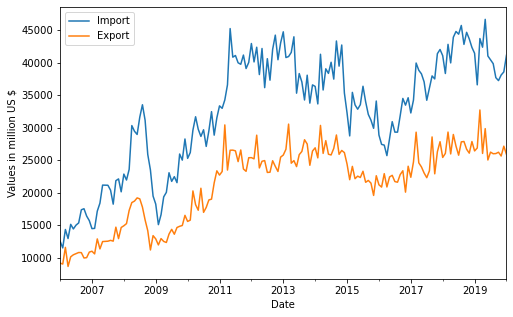

In [15]:
df.plot(figsize = (8,5))
plt.ylabel('Values in million US $')

In [16]:
df_train = df[:-test_count]

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_import = SimpleExpSmoothing(df_train['Import']).fit(smoothing_level=0.6,optimized=False)
yhat_import = model_import.forecast(test_count)
model_export = SimpleExpSmoothing(df_train['Export']).fit(smoothing_level=0.6,optimized=False)
yhat_export = model_export.forecast(test_count)

In [18]:
# from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# model_import = SimpleExpSmoothing(df_train['Import']).fit()
# yhat_import = model_import.forecast(24)
# model_export = SimpleExpSmoothing(df_train['Export']).fit()
# yhat_export = model_export.forecast(24)

In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


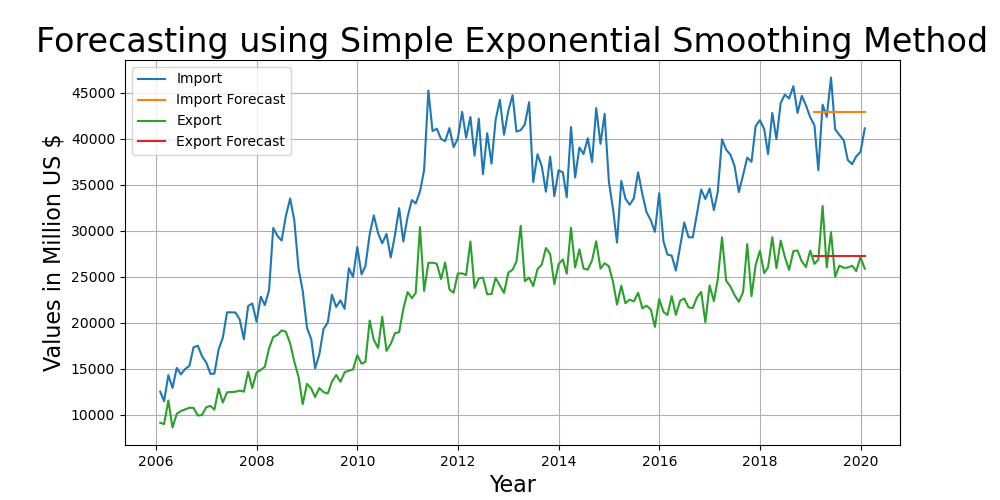

In [20]:
plt.figure(figsize=(10,5))
plt.plot( df['Import'], label='Import')
plt.plot( yhat_import, label='Import Forecast')
plt.plot( df['Export'], label='Export')
plt.plot( yhat_export, label='Export Forecast')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Values in Million US $', fontsize = 16)
plt.title('Forecasting using Simple Exponential Smoothing Method', fontsize = 24)
plt.grid()
plt.legend()
plt.show()

In [21]:
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())

In [22]:
rmse(df['Import'][-test_count:], yhat_import[:test_count]).round(2), rmse(df['Export'][-test_count:],  yhat_export[:test_count]).round(2)

(3771.36, 2042.23)

In [23]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# model_import = ExponentialSmoothing(df_train['Import'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit()
# yhat_import = model_import.forecast(24)
# model_export = ExponentialSmoothing(df_train['Export'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit()
# yhat_export = model_export.forecast(24)

In [24]:
# model_import.model.params